Machine learning courses:

https://www.datacamp.com/courses/designing-machine-learning-workflows-in-python

https://www.datacamp.com/courses/improving-your-data-visualizations-in-python

https://www.datacamp.com/courses/supervised-learning-with-scikit-learn

https://courses.edx.org/courses/course-v1:MITx+6.86x+1T2019/course/


Robb's tutorial:
https://colab.research.google.com/drive/1dvFSTjdC8eTxFrQ0Ho62iD-tiBAZGaiS


Heatmaps:
https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
https://ajh1143.github.io/Corr/


# Loading the required libraries

In [1]:
## Statistical and visualization libraries
import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Mapping libraries
import folium
from folium.plugins import HeatMap

## Machine learning libraries
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder as le
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score,mean_absolute_error

%matplotlib inline

# Loading the data

In [2]:
fires = pd.read_csv('data/fires2.csv', parse_dates=True)
parcels = pd.read_excel('data/parcels2.xlsx', parse_dates=True)
foreclosures = pd.read_excel('data/foreclosures.xlsx', parse_dates=True)
rent_reg = pd.read_excel('data/rental_registration_permits.xlsx', parse_dates=True)
utility_disconnects = pd.read_excel('data/utility_disconnects.xlsx', parse_dates=True)
code_cases = pd.read_excel('data/code_cases.xlsx', parse_dates = True)
sprinklers = pd.read_excel('data/sprinkler_permits.xlsx', parse_dates=True)
comm_sprinklers = pd.read_excel('data/sprinkler_commercial.xlsx', parse_dates = True)
library_cards = pd.read_excel('data/library_cards.xlsx', parse_dates = True)

# Pending : Crime and tax assessment data

# Data description

In [3]:
fires.head(20)

,FID,Join_Count,TARGET_FID,id,id2,type,date,lat,lon,ADDRESS
0,-1,1,0,802421,142,"Brush, or brush and grass mixture fire",4/4/2008 0:00:00,43.508227,-96.696781,4012 S BIRCHWOOD AVE
1,-1,1,1,802683,142,"Brush, or brush and grass mixture fire",4/18/2008 0:00:00,43.559894,-96.734067,1028 N DULUTH AVE
2,-1,0,2,802713,143,Grass fire,4/19/2008 0:00:00,43.552807,-96.858144,
3,-1,0,3,802802,143,Grass fire,4/22/2008 0:00:00,43.527164,-96.780265,
4,-1,1,4,802831,143,Grass fire,4/23/2008 0:00:00,43.558598,-96.702306,1900 E TRACY LN
5,-1,1,5,803159,141,"Forest, woods or wildland fire",5/5/2008 0:00:00,43.514806,-96.810852,3420 S SERTOMA AVE
6,-1,1,6,803497,142,"Brush, or brush and grass mixture fire",5/18/2008 0:00:00,43.545736,-96.738844,901 W 10TH ST
7,-1,1,7,803703,143,Grass fire,5/26/2008 0:00:00,43.500291,-96.788213,5111 W EMMITT CIR
8,-1,1,8,803704,143,Grass fire,5/26/2008 0:00:00,43.529373,-96.790886,5215 W 26TH ST
9,-1,1,9,804218,142,"Brush, or brush and grass mixture fire",6/14/2008 0:00:00,43.553820,-96.800148,601 N VALLEY VIEW RD


In [4]:
fires.dtypes

FID             int64
Join_Count      int64
TARGET_FID      int64
id              int64
id2             int64
type           object
date           object
lat           float64
lon           float64
ADDRESS        object
dtype: object

In [5]:
fires.type.value_counts()

Building fire                                               1258
Passenger vehicle fire                                       639
Cooking fire, confined to container                          244
Grass fire                                                   198
Dumpster or other outside trash receptacle fire              183
Outside rubbish, trash or waste fire                         124
Brush, or brush and grass mixture fire                        94
Special outside fire, other                                   91
Outside equipment fire                                        80
Mobile property (vehicle) fire, other                         71
Fire, other                                                   71
Natural vegetation fire, other                                70
Trash or rubbish fire, contained                              64
Outside rubbish fire, other                                   57
Fire in mobile home used as fixed residence                   56
Road freight or transport

In [6]:
building_fires = fires[fires['id2']== 111].copy()
building_fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 652 to 2318
Data columns (total 10 columns):
FID           1258 non-null int64
Join_Count    1258 non-null int64
TARGET_FID    1258 non-null int64
id            1258 non-null int64
id2           1258 non-null int64
type          1258 non-null object
date          1258 non-null object
lat           1258 non-null float64
lon           1258 non-null float64
ADDRESS       1258 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 108.1+ KB


In [7]:
fire_map = folium.Map(location=[43.54, -96.72], zoom_start=14, tiles='Stamen Terrain')
heat_df = building_fires[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]
HeatMap(heat_data).add_to(fire_map)
fire_map

In [8]:
def explore_dataset(df):
    print('Size of the dataset ', df.shape)
    print('Column types', df.dtypes)
    print('Example', df.head(1))

datasets = [fires, parcels, foreclosures, rent_reg, utility_disconnects, code_cases, sprinklers, comm_sprinklers, library_cards]

for dataset in datasets:
    print(get_df_name(dataset), ' ... has the following columns: ')
    print(dataset.columns)

fires  ... has the following columns: 
Index(['FID', 'Join_Count', 'TARGET_FID', 'id', 'id2', 'type', 'date', 'lat',
       'lon', 'ADDRESS'],
      dtype='object')
parcels  ... has the following columns: 
Index(['TAG', 'COUNTYID', 'ADDRESS', 'OWNNAME1', 'OWNNAME2', 'OWNADDRESS',
       'OWNCITY', 'OWNSTATE', 'OWNZIP', 'OWNZIP2', 'SQFT', 'ACREAGE',
       'FRONTFOOT', 'LEGAL', 'ADDITION', 'ADDITIONNU', 'PARHOUSE', 'PARHALF',
       'PARPR', 'PARSTREET', 'PARTYPE', 'PARPD', 'UNITNUM', 'ACTIVITY',
       'LANDUSE', 'NUMUNITS', 'COUNTY', 'LegalStart', 'GlobalID', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'ADDITIONPR', 'PARCEL_LOT',
       'PARCEL_TRA', 'BlockDesig', 'FORM_PRIMA', 'FORM_ACCES', 'FORM_SIGNE',
       'FORM_DATE', 'FORM_COMME', 'DEPARTMENT', 'PARCELTYPE', 'ZIPCODE',
       'Shape_Leng', 'Shape_Area'],
      dtype='object')
foreclosures  ... has the following columns: 
Index(['ADDRESS', 'NAME', 'AUCTIONDATE', 'ASSESSEDVALUE', 'YEAR'], dtype='object')
rent_

In [9]:
def explore_parcel_data(df):
    """Calculate and display basic data about parcels."""
    print("Number of addresses: ", df.shape[0])
    print('Average Square Footage: ', np.mean(df.SQFT))
    print('Average Acreage: ', np.mean(df.ACREAGE))
    

    

    # Please calculate the following values using the Numpy library
    # Size of data (number of houses)?
    # Number of features?
    # Minimum price?
    # Maximum price?
    # Calculate mean price?
    # Calculate median price?
    # Calculate standard deviation?
    '''
    number_of_parcels = df.shape[0]
    number_of_features = housing_features.shape[1]
    max_price = np.max(housing_prices)
    min_price = np.min(housing_prices)
    mean_price = np.mean(housing_prices)
    median_price = np.median(housing_prices)
    standard_deviation = np.std(housing_prices)

    print("number of features:",number_of_features)
    print("max price of house:",max_price)
    print("min price of house:",min_price)
    print("mean price of house:",mean_price)
    print("median price of house:",median_price)
    print("standard deviation for prices of house:",standard_deviation)
    '''

explore_parcel_data(parcels)


Number of addresses:  59865
Average Square Footage:  30227.185312557227
Average Acreage:  0.6944511462280407


In [10]:
# Check the article to find out how to quickly recognize duplicate data

In [11]:
parcels.shape

(59865, 47)

# Data wrangling

In [12]:
# Wrangling the parcels dataset
parcels.ZIPCODE = parcels.ZIPCODE.astype('object')
parcels['LEGAL_START_YEAR'] = pd.DatetimeIndex(parcels['LegalStart']).year
parcels['OWNER_ZIP'] = str(parcels.OWNZIP)
parcels.OWNZIP2.replace(0, np.nan, inplace=True)
parcels.OWNZIP.replace(0, np.nan, inplace=True)
parcels['OWNER_ZIP'] = parcels.OWNZIP.astype(str) + parcels.OWNZIP2.astype(str)
parcels = pd.concat([parcels, pd.get_dummies(parcels.PARPR), pd.get_dummies(parcels.PARTYPE), pd.get_dummies(parcels.COUNTY)], axis = 1)
parcels.drop(columns = ['TAG', 'COUNTYID', 'OWNNAME1', 'OWNZIP', 'OWNZIP2', 'OWNNAME2', 'OWNCITY', 'OWNSTATE', 'OWNADDRESS', 'LEGAL', 'ADDITIONNU', 'PARHALF', 'PARPD', 'UNITNUM', 'GlobalID', 'last_edite', 'Shape_Leng', 'Shape_Area', 'DEPARTMENT', 'FORM_ACCES', 'FORM_SIGNE', 'FORM_DATE', 'created_da', 'last_edi_1', 'PARPR', 'PARTYPE', 'COUNTY'], inplace = True)


In [13]:
building_fires.drop(columns=['FID', 'Join_Count', 'TARGET_FID', 'id', 'type', 'lat', 'lon', 'date'], inplace = True)
address_grouped = building_fires.groupby('ADDRESS').count()
fire_df = pd.DataFrame(address_grouped)

In [14]:
fire_df.head()

,id2
ADDRESS,
,1
26345 463RD AVE,1
100 E BENSON RD,1
100 S PRAIRIE AVE,1
100 S WILLIAMS AVE,1


In [15]:
df = pd.merge(parcels, fire_df, how = 'left', on='ADDRESS')
print(df.shape)
print(df.id2.sum())

(59865, 46)
1374.0


In [16]:
df.loc[df['id2'] >= 1, 'INCIDENT'] = 1
df.loc[df['id2'] != 1, 'INCIDENT'] = 0
df.drop(columns=['id2'], inplace = True)

In [17]:
foreclosure_df = pd.DataFrame(foreclosures.groupby('ADDRESS').count())
foreclosure_df.rename(columns = { 'NAME' : 'FORECLOSED'}, inplace = True)
foreclosure_df.drop(columns = ['AUCTIONDATE', 'ASSESSEDVALUE', 'YEAR'], inplace = True)
df = pd.merge(df, foreclosure_df, how = 'left', on = 'ADDRESS')
df.FORECLOSED.fillna(0, inplace = True)

In [18]:
df.FORECLOSED.sum()

1919.0

[Text(0.5, 0, 'SQFT'),
 Text(1.5, 0, 'ACREAGE'),
 Text(2.5, 0, 'FRONTFOOT'),
 Text(3.5, 0, 'PARHOUSE'),
 Text(4.5, 0, 'ACTIVITY'),
 Text(5.5, 0, 'LANDUSE'),
 Text(6.5, 0, 'NUMUNITS'),
 Text(7.5, 0, 'LEGAL_START_YEAR'),
 Text(8.5, 0, 'E'),
 Text(9.5, 0, 'N'),
 Text(10.5, 0, 'S'),
 Text(11.5, 0, 'W'),
 Text(12.5, 0, 'AVE'),
 Text(13.5, 0, 'BLVD'),
 Text(14.5, 0, 'CIR'),
 Text(15.5, 0, 'CT'),
 Text(16.5, 0, 'DR'),
 Text(17.5, 0, 'HTS'),
 Text(18.5, 0, 'LN'),
 Text(19.5, 0, 'MNR'),
 Text(20.5, 0, 'PASS'),
 Text(21.5, 0, 'PKWY'),
 Text(22.5, 0, 'PL'),
 Text(23.5, 0, 'RD'),
 Text(24.5, 0, 'RDG'),
 Text(25.5, 0, 'ST'),
 Text(26.5, 0, 'TER'),
 Text(27.5, 0, 'TRL'),
 Text(28.5, 0, 'WAY'),
 Text(29.5, 0, 'LINCOLN'),
 Text(30.5, 0, 'MINNEHAHA'),
 Text(31.5, 0, 'INCIDENT'),
 Text(32.5, 0, 'FORECLOSED')]

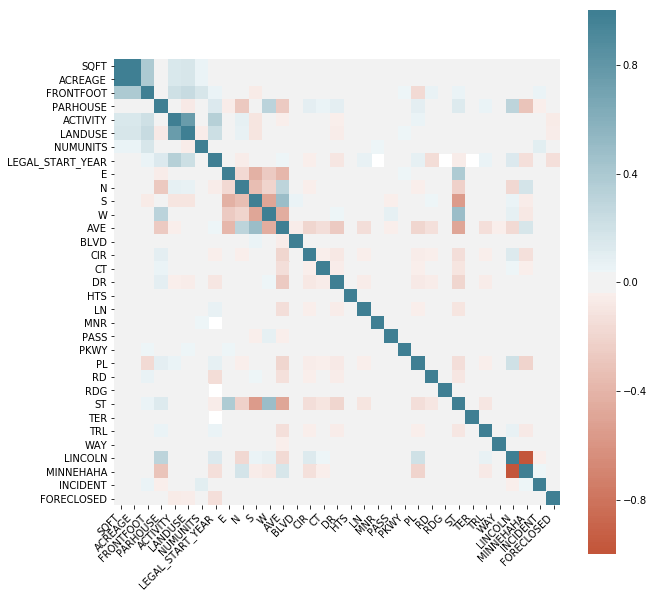

In [19]:
corr = df.corr()


plt.figure(figsize = (10,10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Machine Learning Model

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59865 entries, 0 to 59864
Data columns (total 47 columns):
ADDRESS             59855 non-null object
SQFT                59865 non-null float64
ACREAGE             59865 non-null float64
FRONTFOOT           59865 non-null float64
ADDITION            59846 non-null object
PARHOUSE            59852 non-null float64
PARSTREET           59148 non-null object
ACTIVITY            59865 non-null int64
LANDUSE             59865 non-null int64
NUMUNITS            59865 non-null int64
LegalStart          9993 non-null datetime64[ns]
created_us          59865 non-null object
ADDITIONPR          2743 non-null object
PARCEL_LOT          18420 non-null object
PARCEL_TRA          1133 non-null object
BlockDesig          22536 non-null object
FORM_PRIMA          55453 non-null object
FORM_COMME          21681 non-null object
PARCELTYPE          59855 non-null object
ZIPCODE             59865 non-null object
LEGAL_START_YEAR    9993 non-null float64
OWN

In [29]:
X = df[['SQFT', 'NUMUNITS', 'E']]
y = df['INCIDENT']


# Fuck the pipeline, do a normal random forest fit and a cross val to check

rf = RandomForestClassifier(max_depth=5, n_estimators=10)
rf.fit(X, y)

'''
def rfc_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'max_depth': range(3,5),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfc = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfc, X, y, cv=5)

    return scores

results = rfc_model(X, y)

print(results)
'''


'\ndef rfc_model(X, y):\n# Perform Grid-Search\n    gsc = GridSearchCV(\n        estimator=RandomForestClassifier(),\n        param_grid={\n            \'max_depth\': range(3,5),\n            \'n_estimators\': (10, 50, 100, 1000),\n        },\n        cv=5, verbose=0, n_jobs=-1)\n    \n    grid_result = gsc.fit(X, y)\n    best_params = grid_result.best_params_\n    \n    rfc = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)\n# Perform K-Fold CV\n    scores = cross_val_score(rfc, X, y, cv=5)\n\n    return scores\n\nresults = rfc_model(X, y)\n\nprint(results)\n'

In [30]:
cross_val_score(rf, X, y, cv=3)

array([0.9827111 , 0.98266099, 0.9827111 ])

# Fitting the winning model and analyzing the results

In [22]:
print(np.mean(results))

best = 0.9827111068301398

print('Best score so far is...', best)

0.9827110999749437
Best score so far is... 0.9827111068301398


In [34]:
print ('A baseline guess would be...', 1-1035/59865)

A baseline guess would be... 0.9827110999749437
